Text(0.5, 1.0, 'Signatures spectrales moyennes par espèce')

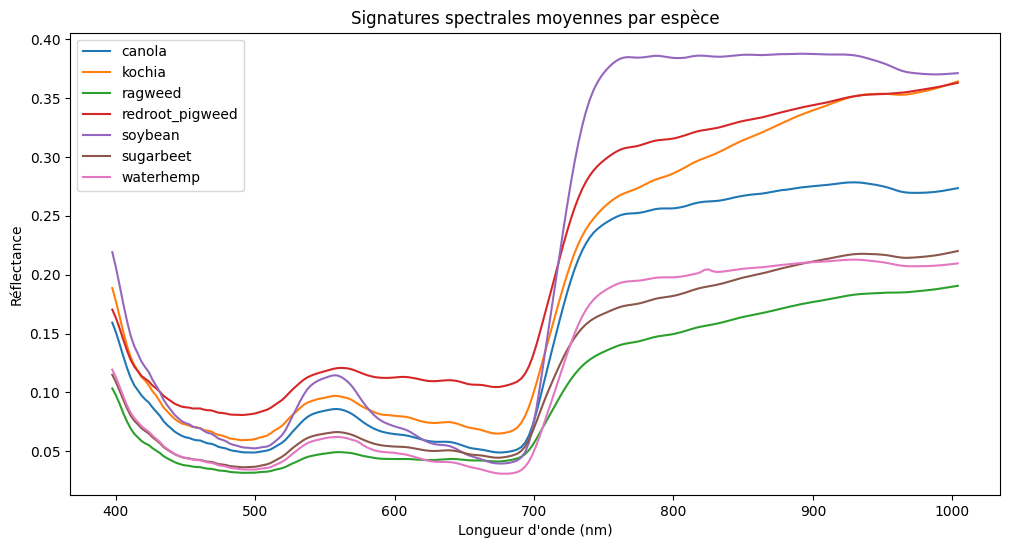

In [16]:
#### 1. Analyse et prétraitement des données

# Chargement et visualisation des données
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les données
data = pd.read_csv('combined_data.csv')

# Visualiser les signatures spectrales
plt.figure(figsize=(12, 6))
for classe in data['class'].unique():
    subset = data[data['class'] == classe]
    plt.plot(data.columns[:-1].astype(float), subset.iloc[:,:-1].mean(), label=classe)
plt.xlabel('Longueur d\'onde (nm)')  # Correction ici
plt.ylabel('Réflectance')
plt.legend()
plt.title('Signatures spectrales moyennes par espèce')

Ce graphique représente les signatures spectrales moyennes des différentes espèces de plantes présentes.

1. Axes du graphique
- Axe des X (Longueur d'onde) :
Représente les longueurs d'onde en nanomètres (nm), allant de 400 nm à 1000 nm. Cela correspond à la gamme spectrale mesurée par le capteur hyperspectral.
- Axe des Y (Réflectance) :
Représente la réflectance moyenne pour chaque longueur d'onde.
La réflectance est une mesure de la lumière réfléchie par la plante par rapport à la lumière incidente. Elle est normalisée entre 0 et 1.

2. Courbes
Ces courbes montrent comment chaque espèce réfléchit la lumière à différentes longueurs d'onde.

3. Interpretation :
- Différences spectrales :
Les courbes montrent que chaque espèce a une signature spectrale unique, ce qui signifie qu'elles réfléchissent la lumière différemment selon la longueur d'onde.
- Régions spectrales importantes :
Les variations les plus significatives se produisent dans certaines plages de longueurs d'onde :
400-500 nm : Réflectance faible pour toutes les espèces.
700-800 nm : Forte augmentation de la réflectance pour certaines espèces.
800-1000 nm : Les courbes se stabilisent, mais des différences subsistent.
- Les longueurs d'onde où les courbes divergent le plus (par exemple, autour de 700 nm) sont particulièrement importantes pour discriminer les espèces.


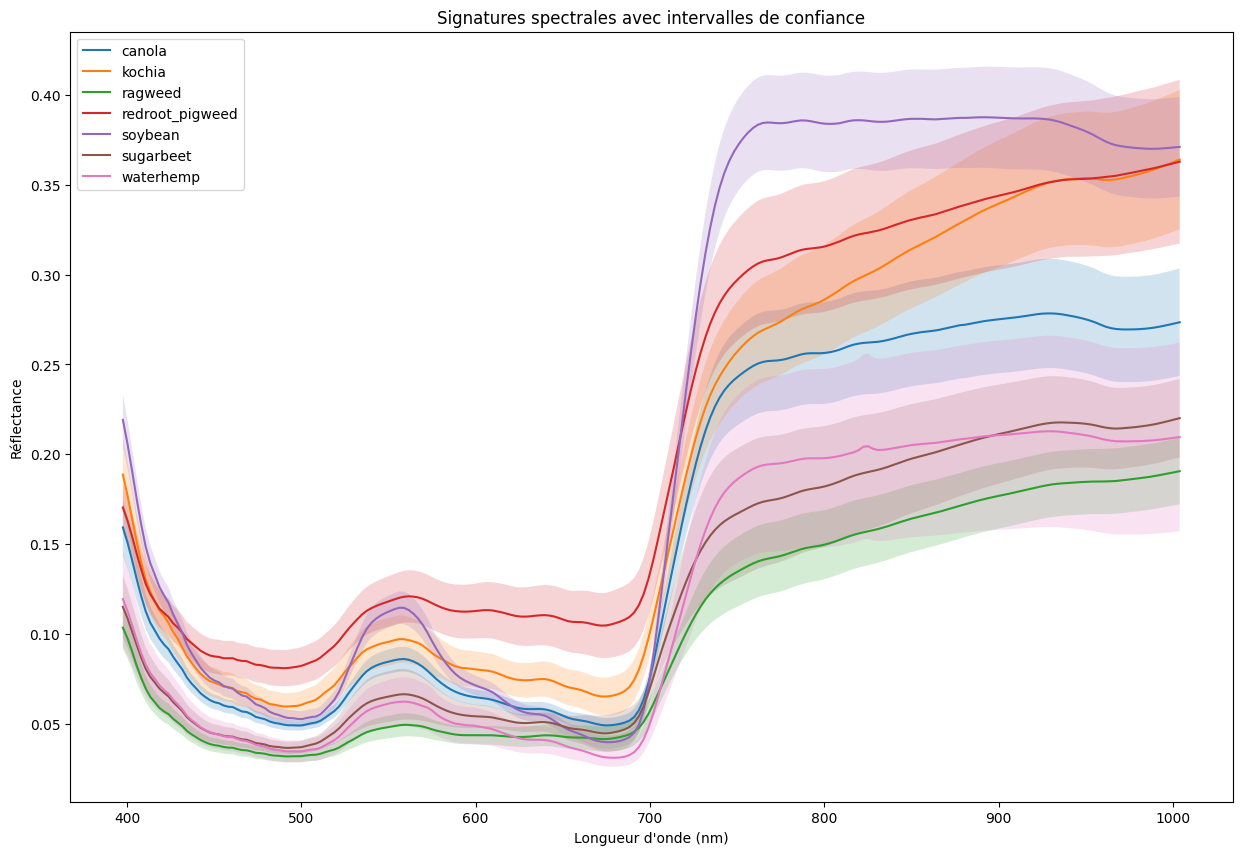

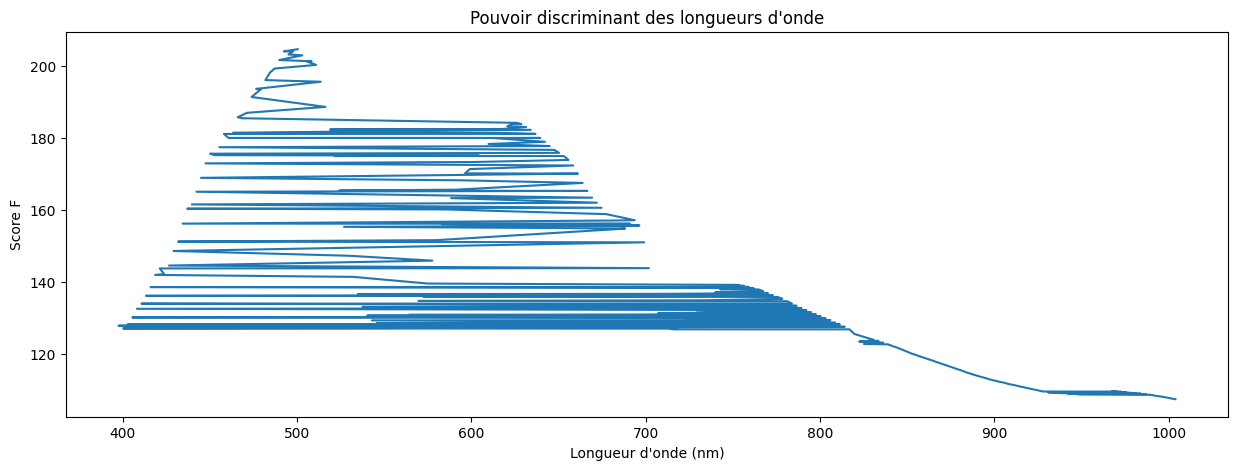


Top 10 longueurs d'onde les plus discriminantes:
    wavelength     f_score       p_value
39      500.37  204.597727  1.979456e-70
36      492.42  204.004928  2.409762e-70
38      497.72  203.991072  2.420882e-70
37      495.07  203.148897  3.204245e-70
40      503.02  202.894023  3.488676e-70
35      489.77  201.598289  5.383543e-70
42      508.32  201.254616  6.042549e-70
41      505.67  201.205427  6.143340e-70
43      510.98  200.240644  8.504148e-70
34      487.12  199.233494  1.195919e-69

Statistiques pour canola:
Réflectance moyenne: 0.1586
Écart-type moyen: 0.0160
Réflectance min: 0.0427
Réflectance max: 0.3144

Statistiques pour kochia:
Réflectance moyenne: 0.1898
Écart-type moyen: 0.0210
Réflectance min: 0.0455
Réflectance max: 0.4163

Statistiques pour ragweed:
Réflectance moyenne: 0.1002
Écart-type moyen: 0.0115
Réflectance min: 0.0250
Réflectance max: 0.2252

Statistiques pour redroot_pigweed:
Réflectance moyenne: 0.2105
Écart-type moyen: 0.0256
Réflectance min: 0.0565
R

In [17]:
#### 2. Analyse exploratoire des données hyperspectrales

# 1. Import des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 2. Calcul des statistiques descriptives par espèce
def calculate_spectral_statistics(data):
    # Séparer les longueurs d'onde et les classes
    wavelengths = data.columns[:-1].astype(float)
    stats_by_species = {}
    
    for species in data['class'].unique():
        species_data = data[data['class'] == species].iloc[:,:-1]
        stats_by_species[species] = {
            'mean': species_data.mean(),
            'std': species_data.std(),
            'min': species_data.min(),
            'max': species_data.max()
        }
    return stats_by_species, wavelengths

# 3. Identification des longueurs d'onde discriminantes
def find_discriminant_wavelengths(data):
    # Calculer le ratio F pour chaque longueur d'onde
    wavelengths = data.columns[:-1]
    f_scores = []
    p_values = []
    
    for wave in wavelengths:
        f_stat, p_val = stats.f_oneway(*[group[wave].values 
                                        for name, group in data.groupby('class')])
        f_scores.append(f_stat)
        p_values.append(p_val)
    
    return pd.DataFrame({
        'wavelength': wavelengths.astype(float),
        'f_score': f_scores,
        'p_value': p_values
    }).sort_values('f_score', ascending=False)

# 4. Visualisation des résultats
def plot_spectral_analysis(stats_by_species, wavelengths, discriminant_waves):
    # 1. Courbes moyennes avec intervalles de confiance
    plt.figure(figsize=(15, 10))
    
    # Plot des moyennes et écarts-types
    for species in stats_by_species.keys():
        mean = stats_by_species[species]['mean']
        std = stats_by_species[species]['std']
        plt.plot(wavelengths, mean, label=species)
        plt.fill_between(wavelengths, 
                        mean - std, 
                        mean + std, 
                        alpha=0.2)
    
    plt.xlabel('Longueur d\'onde (nm)')
    plt.ylabel('Réflectance')
    plt.title('Signatures spectrales avec intervalles de confiance')
    plt.legend()
    plt.show()

    # 2. Top longueurs d'onde discriminantes
    plt.figure(figsize=(15, 5))
    plt.plot(discriminant_waves['wavelength'], 
             discriminant_waves['f_score'])
    plt.xlabel('Longueur d\'onde (nm)')
    plt.ylabel('Score F')
    plt.title('Pouvoir discriminant des longueurs d\'onde')
    plt.show()

# 5. Exécution de l'analyse
stats_by_species, wavelengths = calculate_spectral_statistics(data)
discriminant_waves = find_discriminant_wavelengths(data)

# Afficher les résultats
plot_spectral_analysis(stats_by_species, wavelengths, discriminant_waves)

# Afficher les 10 longueurs d'onde les plus discriminantes
print("\nTop 10 longueurs d'onde les plus discriminantes:")
print(discriminant_waves.head(10))

# Statistiques descriptives pour chaque espèce
for species in stats_by_species.keys():
    print(f"\nStatistiques pour {species}:")
    print(f"Réflectance moyenne: {stats_by_species[species]['mean'].mean():.4f}")
    print(f"Écart-type moyen: {stats_by_species[species]['std'].mean():.4f}")
    print(f"Réflectance min: {stats_by_species[species]['min'].min():.4f}")
    print(f"Réflectance max: {stats_by_species[species]['max'].max():.4f}")

Interpretation

1. Les longueurs d'onde les plus discriminantes sont identifiées par leur score F élevé. Voici ce que cela signifie :

Longueurs d'onde clés : Les longueurs d'onde autour de 500 nm ont les scores F les plus élevés.
Interprétation :
Ces longueurs d'onde sont les plus importantes pour différencier les espèces.
Cela signifie que les plantes ont des différences significatives dans leur réflectance à ces longueurs d'onde.
Ces longueurs d'onde se situent dans la région visible (bleu-vert), ce qui est cohérent avec les propriétés spectrales des plantes.

2. Les statistiques descriptives montrent les caractéristiques spectrales moyennes de chaque espèce :

Réflectance moyenne :
Par exemple, canola a une réflectance moyenne de 0.1586, tandis que kochia a une réflectance moyenne de 0.1898.
Cela indique que kochia réfléchit plus de lumière en moyenne que canola.
Écart-type moyen :
Par exemple, canola a un écart-type moyen de 0.0160, tandis que kochia a un écart-type moyen de 0.0210.
Cela signifie que kochia a une plus grande variabilité dans sa réflectance, ce qui peut être utile pour la classification.
Réflectance min/max :
Ces valeurs montrent les plages de réflectance pour chaque espèce.
Par exemple, canola a une réflectance maximale de 0.3144, tandis que kochia atteint 0.4163.
Prochaine étape :

3. Graphiques générés
Graphique 1 : Signatures spectrales avec intervalles de confiance
Ce graphique montre les réflectances moyennes pour chaque espèce, avec des intervalles de confiance (écart-type).
Interprétation :
Les espèces ont des signatures spectrales distinctes, en particulier dans certaines régions (par exemple, autour de 500-700 nm).
Ces différences peuvent être exploitées pour la classification.
Graphique 2 : Pouvoir discriminant des longueurs d'onde
Ce graphique montre le score F pour chaque longueur d'onde.
Interprétation :
Les longueurs d'onde autour de 500 nm ont les scores F les plus élevés, ce qui confirme leur importance pour la discrimination des espèces.
Prochaine étape :
Utilisez ces graphiques pour sélectionner les longueurs d'onde importantes et valider leur pertinence pour la classification.



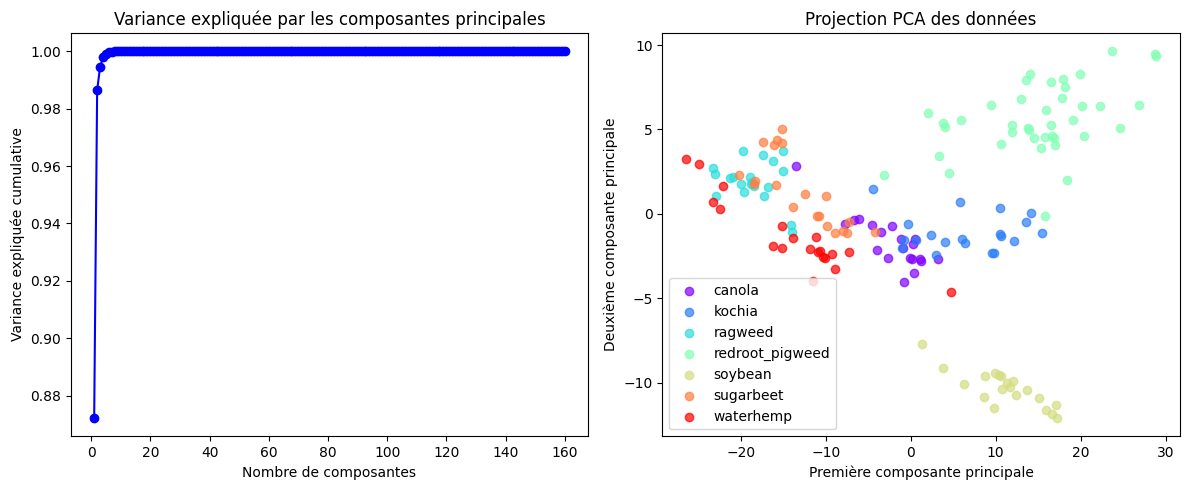


Pourcentage de variance expliquée par composante:
PC1: 87.23%
PC2: 11.41%
PC3: 0.81%
PC4: 0.34%
PC5: 0.12%


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def perform_pca_analysis(data):
    # Préparer les données
    X = data.iloc[:, :-1]  # Toutes les colonnes sauf la dernière (class)
    y = data['class']
    
    # Standardiser les données
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Appliquer PCA
    pca = PCA()
    X_pca = pca.fit_transform(X_scaled)
    
    # Calculer la variance expliquée cumulative
    var_ratio = np.cumsum(pca.explained_variance_ratio_)
    
    # Créer la figure avec deux sous-graphiques
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # Premier graphique : variance expliquée
    ax1.plot(range(1, len(var_ratio) + 1), var_ratio, 'bo-')
    ax1.set_xlabel('Nombre de composantes')
    ax1.set_ylabel('Variance expliquée cumulative')
    ax1.set_title('Variance expliquée par les composantes principales')
    
    # Deuxième graphique : projection des données
    unique_classes = np.unique(y)
    colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_classes)))
    
    for class_name, color in zip(unique_classes, colors):
        mask = y == class_name
        ax2.scatter(X_pca[mask, 0], X_pca[mask, 1], 
                   label=class_name, color=color, alpha=0.7)
    
    ax2.set_xlabel('Première composante principale')
    ax2.set_ylabel('Deuxième composante principale')
    ax2.set_title('Projection PCA des données')
    ax2.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Afficher le pourcentage de variance expliquée
    print("\nPourcentage de variance expliquée par composante:")
    for i, var in enumerate(pca.explained_variance_ratio_[:5], 1):
        print(f"PC{i}: {var*100:.2f}%")
    
    return pca, X_pca

# Charger les données si ce n'est pas déjà fait
if 'data' not in locals():
    data = pd.read_csv('combined_data.csv')

# Exécuter l'analyse PCA
pca, X_pca = perform_pca_analysis(data)

# Interpretation

1. Variance expliquée par les composantes principales
PC1 (87.23%) :
La première composante principale capture 87.23% de la variance totale des données.
Cela signifie que cette composante résume presque toute l'information importante des données hyperspectrales.
PC2 (11.41%) :

La deuxième composante principale capture 11.41% de la variance.
Ensemble, PC1 et PC2 capturent 98.64% de la variance totale, ce qui est suffisant pour représenter les données.

2. Graphique de la variance expliquée cumulative
La courbe montre que la variance cumulée atteint presque 100% avec seulement 2 composantes.
Cela confirme que les deux premières composantes suffisent pour capturer l'essentiel de l'information.

3. Graphique de la projection PCA
Ce graphique montre la séparation des espèces dans l'espace des deux premières composantes principales.
Interprétation :
Les points de couleurs différentes représentent les différentes espèces.
Certaines espèces (par exemple, redroot pigweed et waterhemp) semblent bien séparées.
D'autres espèces (par exemple, soybean et sugarbeet) se chevauchent légèrement, ce qui pourrait rendre leur classification plus difficile.

In [8]:
# Réduction à 2 composantes principales
X_pca_reduced = X_pca[:, :2]

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(
    X_pca_reduced, data['class'], test_size=0.2, random_state=42
)

# Entraîner un modèle Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Prédictions et évaluation
y_pred = clf.predict(X_test)
print("\nRapport de classification :")
print(classification_report(y_test, y_pred))


Rapport de classification :
                 precision    recall  f1-score   support

         canola       0.60      0.50      0.55         6
         kochia       0.50      0.75      0.60         4
        ragweed       0.67      0.67      0.67         3
redroot_pigweed       1.00      0.86      0.92         7
        soybean       1.00      1.00      1.00         5
      sugarbeet       1.00      0.67      0.80         3
      waterhemp       0.80      1.00      0.89         4

       accuracy                           0.78        32
      macro avg       0.80      0.78      0.77        32
   weighted avg       0.81      0.78      0.78        32



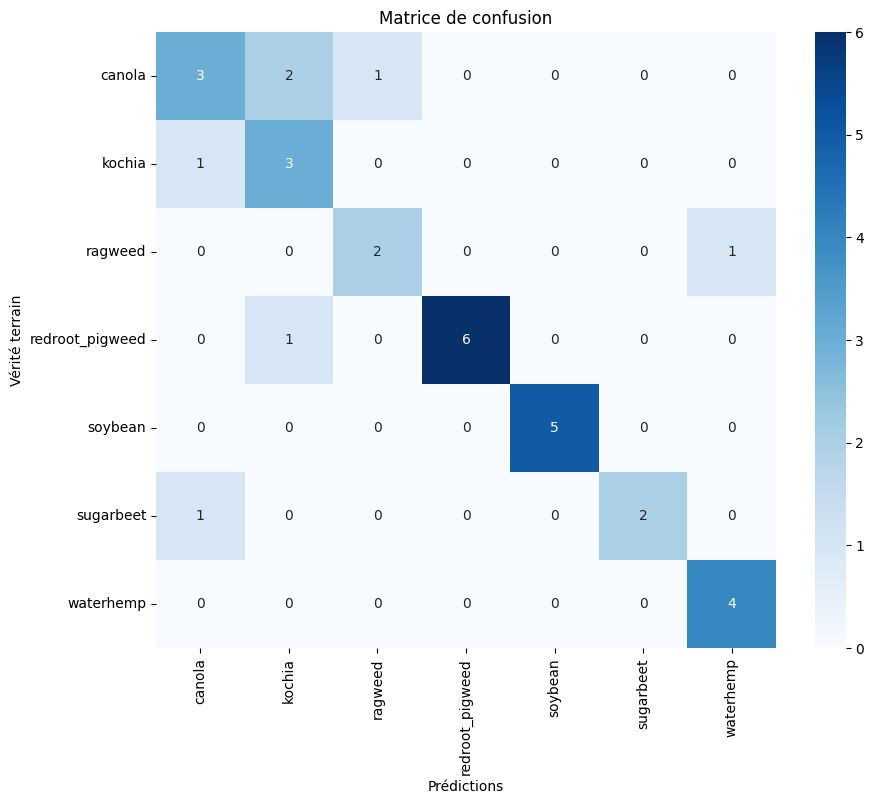

In [23]:
# Matrice de confusion

from sklearn.metrics import confusion_matrix
import seaborn as sns

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=data['class'].unique(), 
            yticklabels=data['class'].unique())
plt.xlabel('Prédictions')
plt.ylabel('Vérité terrain')
plt.title('Matrice de confusion')
plt.show()

# Interpretation

1. Structure de la matrice
Lignes (vérité terrain) : Les classes réelles des échantillons.
Colonnes (prédictions) : Les classes prédites par le modèle.
Les valeurs dans les cellules représentent le nombre d'échantillons pour chaque combinaison de classe réelle et prédite.
2. Analyse des performances par classe
Classe : canola
Prédictions correctes : 3 (cellule (canola, canola)).
Erreurs :
2 échantillons de canola ont été mal classés comme kochia.
1 échantillon de canola a été mal classé comme ragweed.
Interprétation :
Le modèle a des difficultés à distinguer canola de kochia et ragweed.
Classe : kochia
Prédictions correctes : 3 (cellule (kochia, kochia)).
Erreurs :
1 échantillon de kochia a été mal classé comme canola.
Interprétation :
Les performances pour kochia sont correctes, mais il y a une confusion mineure avec canola.
Classe : ragweed
Prédictions correctes : 2 (cellule (ragweed, ragweed)).
Erreurs :
2 échantillons de ragweed ont été mal classés comme kochia.
1 échantillon de ragweed a été mal classé comme waterhemp.
Interprétation :
Le modèle a des difficultés à distinguer ragweed de kochia et waterhemp.
Classe : redroot_pigweed
Prédictions correctes : 6 (cellule (redroot_pigweed, redroot_pigweed)).
Erreurs :
1 échantillon de redroot_pigweed a été mal classé comme kochia.
Interprétation :
Redroot pigweed est bien classé, avec seulement une erreur mineure.
Classe : soybean
Prédictions correctes : 5 (cellule (soybean, soybean)).
Erreurs : Aucune.
Interprétation :
Soybean est parfaitement classé dans cet ensemble de test.
Classe : sugarbeet
Prédictions correctes : 2 (cellule (sugarbeet, sugarbeet)).
Erreurs :
1 échantillon de sugarbeet a été mal classé comme canola.
Interprétation :
Le modèle a une confusion mineure entre sugarbeet et canola.
Classe : waterhemp
Prédictions correctes : 4 (cellule (waterhemp, waterhemp)).
Erreurs : Aucune.
Interprétation :
Waterhemp est parfaitement classé dans cet ensemble de test.
3. Performances globales
Classes bien classées :
Soybean et waterhemp sont parfaitement classés (aucune erreur).
Redroot pigweed a une très bonne performance avec seulement une erreur.
Classes problématiques :
Canola et ragweed montrent des confusions fréquentes avec d'autres classes (kochia et waterhemp).
Cela peut indiquer que leurs signatures spectrales sont similaires ou que le modèle manque de données pour ces classes.

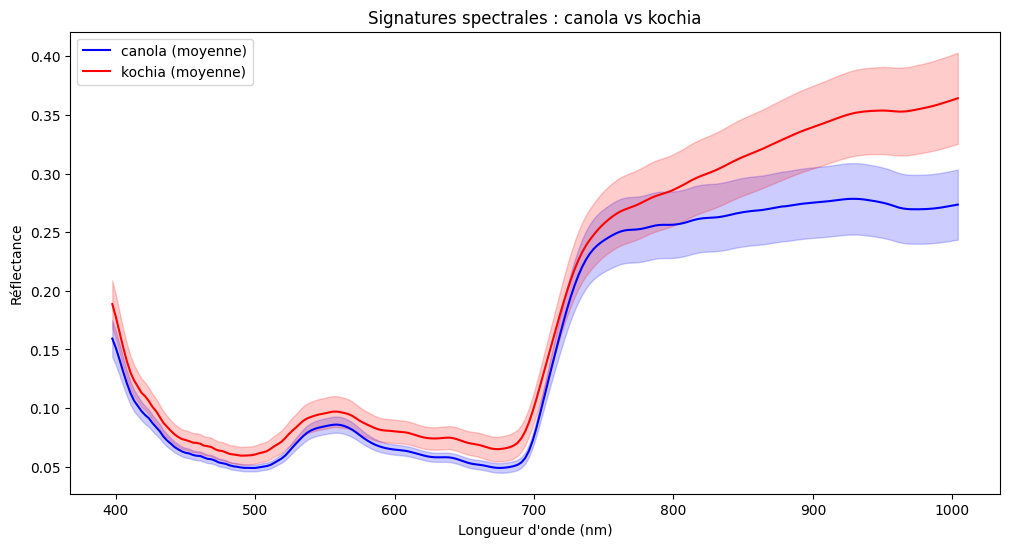

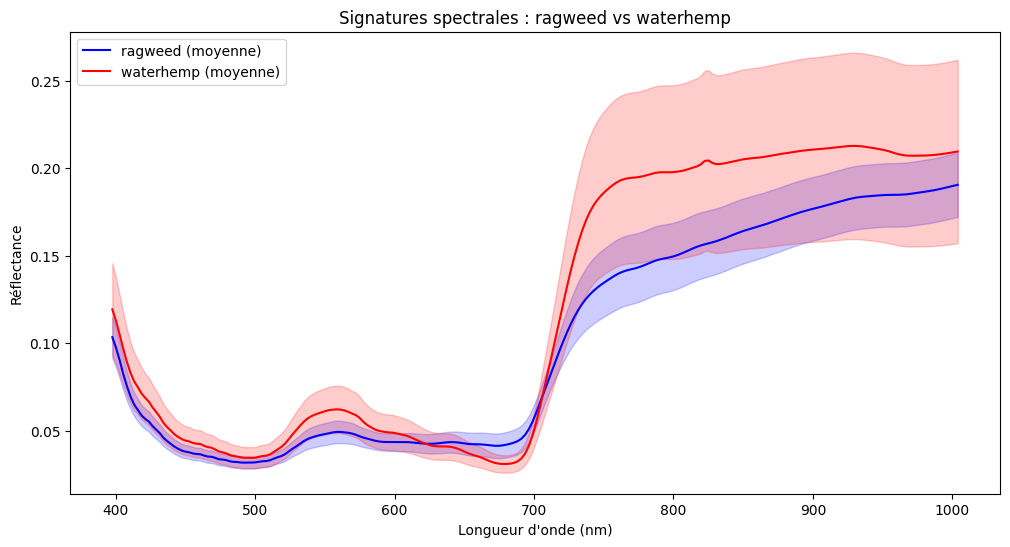

In [ ]:
#### Analyse des signatures spectrales des classes confondues

def plot_confused_classes(data, class1, class2):
    """Visualiser les signatures spectrales de deux classes."""
    plt.figure(figsize=(12, 6))
    
    # Extraire les données spectrales
    wavelengths = data.columns[:-1].astype(float)
    class1_data = data[data['class'] == class1].iloc[:, :-1]
    class2_data = data[data['class'] == class2].iloc[:, :-1]
    
    # Tracer les moyennes et écarts-types
    plt.plot(wavelengths, class1_data.mean(), label=f'{class1} (moyenne)', color='blue')
    plt.fill_between(wavelengths, 
                     class1_data.mean() - class1_data.std(),
                     class1_data.mean() + class1_data.std(),
                     alpha=0.2, color='blue')
    
    plt.plot(wavelengths, class2_data.mean(), label=f'{class2} (moyenne)', color='red')
    plt.fill_between(wavelengths, 
                     class2_data.mean() - class2_data.std(),
                     class2_data.mean() + class2_data.std(),
                     alpha=0.2, color='red')
    
    plt.xlabel('Longueur d\'onde (nm)')
    plt.ylabel('Réflectance')
    plt.title(f'Signatures spectrales : {class1} vs {class2}')
    plt.legend()
    plt.show()

# Analyser les classes confondues
plot_confused_classes(data, 'canola', 'kochia')
plot_confused_classes(data, 'ragweed', 'waterhemp')

In [25]:
#### Optimisation des hyperparamètres du Random Forest

from sklearn.model_selection import GridSearchCV

# Définir la grille de paramètres
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Créer et exécuter la recherche par grille
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Meilleurs paramètres:", grid_search.best_params_)
print("Meilleur score:", grid_search.best_score_)

# Utiliser le meilleur modèle
best_rf = grid_search.best_estimator_
y_pred_optimized = best_rf.predict(X_test)
print("\nRapport de classification avec le modèle optimisé:")
print(classification_report(y_test, y_pred_optimized))

Meilleurs paramètres: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Meilleur score: 0.8286153846153846

Rapport de classification avec le modèle optimisé:
                 precision    recall  f1-score   support

         canola       0.83      0.83      0.83         6
         kochia       0.80      1.00      0.89         4
        ragweed       0.67      0.67      0.67         3
redroot_pigweed       1.00      0.86      0.92         7
        soybean       1.00      1.00      1.00         5
      sugarbeet       0.50      0.67      0.57         3
      waterhemp       1.00      0.75      0.86         4

       accuracy                           0.84        32
      macro avg       0.83      0.82      0.82        32
   weighted avg       0.87      0.84      0.85        32



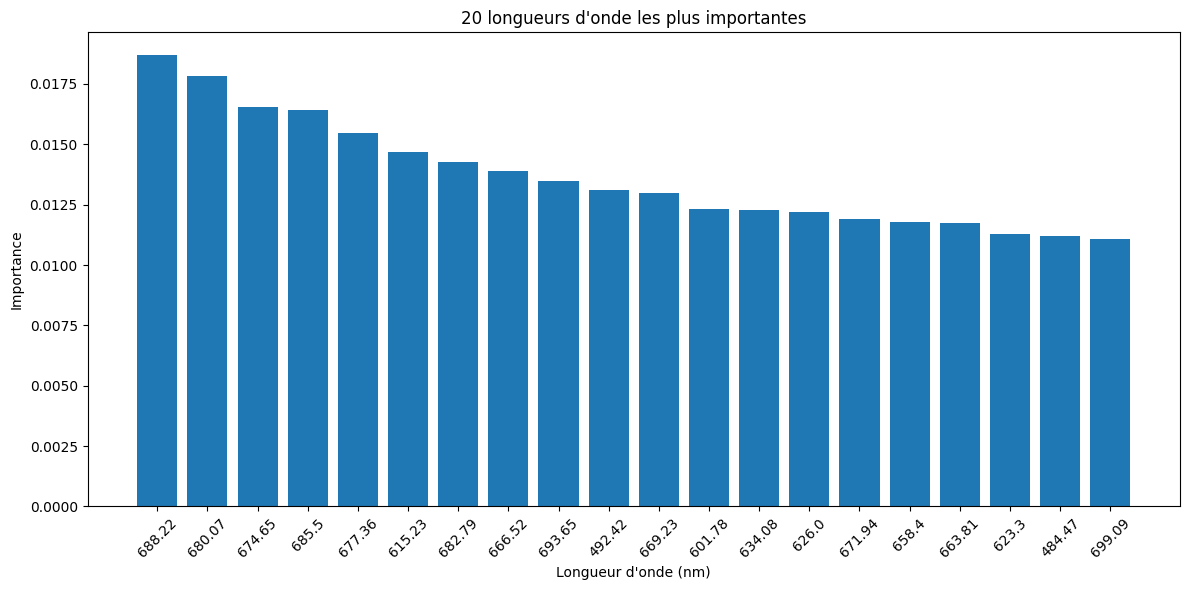

In [27]:
#### Réduction de dimensionnalité basée sur l'importance des caractéristiques

def select_best_features(X, y, n_features=20):
    """Sélectionner les meilleures longueurs d'onde."""
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X, y)
    
    # Obtenir l'importance des caractéristiques
    importance = pd.DataFrame({
        'wavelength': X.columns,
        'importance': rf.feature_importances_
    }).sort_values('importance', ascending=False)  # Correction ici
    
    # Sélectionner les meilleures caractéristiques
    best_features = importance['wavelength'].head(n_features)
    return best_features, importance

# Le reste du code reste identique
X = data.iloc[:, :-1]
y = data['class']
best_features, importance = select_best_features(X, y)

# Visualiser l'importance des caractéristiques
plt.figure(figsize=(12, 6))
plt.bar(importance['wavelength'].head(20), importance['importance'].head(20))
plt.xticks(rotation=45)
plt.xlabel('Longueur d\'onde (nm)')
plt.ylabel('Importance')
plt.title('20 longueurs d\'onde les plus importantes')
plt.tight_layout()
plt.show()

Les longueurs d'onde autour de 500-550 nm semblent être les plus importantes
Cette région correspond à la lumière verte-bleue du spectre visible


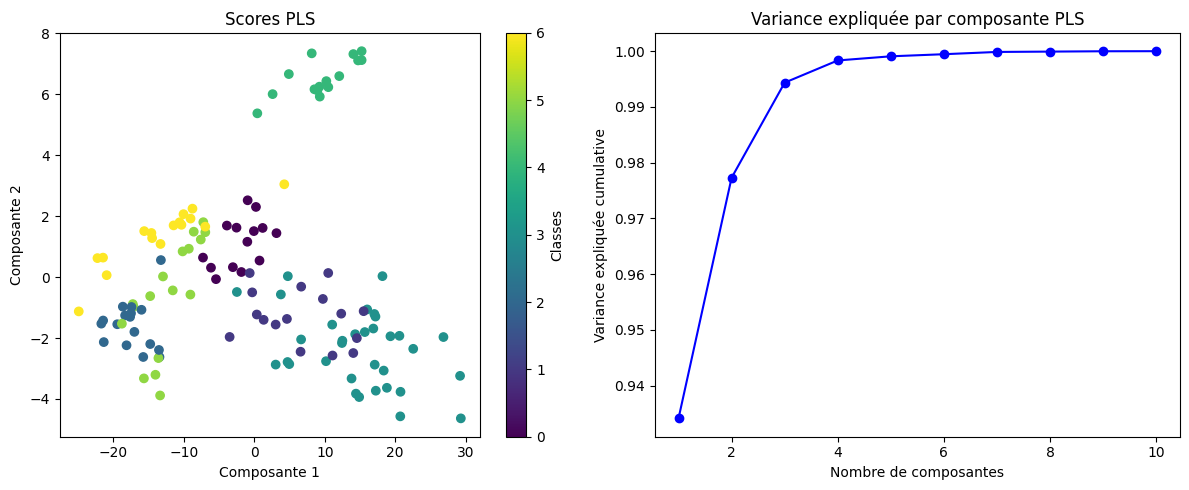


Rapport de classification PLS-DA:
                 precision    recall  f1-score   support

         canola       0.75      0.50      0.60         6
         kochia       0.60      0.75      0.67         4
        ragweed       0.25      0.33      0.29         3
redroot_pigweed       0.38      0.43      0.40         7
        soybean       0.20      0.20      0.20         5
      sugarbeet       0.50      0.33      0.40         3
      waterhemp       0.50      0.50      0.50         4

       accuracy                           0.44        32
      macro avg       0.45      0.44      0.44        32
   weighted avg       0.46      0.44      0.44        32


Longueurs d'onde les plus importantes (VIP > 1):
   wavelength  VIP_score
0      397.66  17.747194
48     524.27  15.608624
47     521.61  15.261813
1      400.28  15.000762
49     526.93  14.914896


In [ ]:
###PLS
# Import des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

def perform_plsda_analysis(data, n_components=10):
    # Préparation des données
    X = data.iloc[:, :-1]  # Toutes les colonnes sauf la dernière (class)
    
    # Encoder les classes
    le = LabelEncoder()
    y = le.fit_transform(data['class'])
    
    # Standardisation
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Division train/test
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, random_state=42
    )
    
    # Création et entraînement du modèle PLS
    pls = PLSRegression(n_components=n_components)
    pls.fit(X_train, y_train.reshape(-1, 1))  # Reshape y pour PLSRegression
    
    # Prédictions
    y_pred_raw = pls.predict(X_test)
    y_pred = np.clip(np.round(y_pred_raw), 0, len(np.unique(y)) - 1).astype(int).ravel()
    
    # Visualisation des résultats
    plt.figure(figsize=(12, 5))
    
    # Plot 1: Scores avec colormap
    plt.subplot(121)
    scatter = plt.scatter(pls.x_scores_[:, 0], pls.x_scores_[:, 1], 
                         c=y_train, cmap='viridis')
    plt.colorbar(scatter, label='Classes')
    plt.xlabel('Composante 1')
    plt.ylabel('Composante 2')
    plt.title('Scores PLS')
    
    # Plot 2: Variance expliquée
    plt.subplot(122)
    explained_variance = np.var(pls.x_scores_, axis=0)
    explained_variance_ratio = explained_variance / np.sum(explained_variance)
    cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
    
    plt.plot(range(1, n_components + 1), cumulative_variance_ratio, 'bo-')
    plt.xlabel('Nombre de composantes')
    plt.ylabel('Variance expliquée cumulative')
    plt.title('Variance expliquée par composante PLS')
    
    plt.tight_layout()
    plt.show()
    
    # Afficher les résultats
    print("\nRapport de classification PLS-DA:")
    print(classification_report(y_test, y_pred, 
                              target_names=le.classes_))
    
    # Identifier les longueurs d'onde importantes
    vip_scores = calculate_vip_scores(pls, X)
    important_wavelengths = pd.DataFrame({
        'wavelength': data.columns[:-1],
        'VIP_score': vip_scores
    }).sort_values('VIP_score', ascending=False)
    
    print("\nLongueurs d'onde les plus importantes (VIP > 1):")
    print(important_wavelengths[important_wavelengths['VIP_score'] > 1].head())
    
    return pls, scaler, le

# Charger les données si ce n'est pas déjà fait
if 'data' not in locals():
    data = pd.read_csv('combined_data.csv')

# Exécuter l'analyse PLS-DA
pls_model, scaler, label_encoder = perform_plsda_analysis(data)

In [29]:
def calculate_vip_scores(pls, X):
    """Calcul des scores VIP (Variable Importance in Projection)"""
    t = pls.x_scores_
    w = pls.x_weights_
    q = pls.y_weights_
    p = pls.x_loadings_
    
    m = X.shape[1]
    p2 = np.sum(np.square(p), axis=1)
    w2 = np.sum(np.square(w), axis=1)
    
    vip_scores = np.sqrt(m * np.sum(np.square(w) * np.square(q), axis=1) / np.sum(p2 * w2))
    
    return vip_scores


Variance expliquée par composante :
Composante 1: 93.41%
Composante 2: 4.32%
Composante 3: 1.71%
Composante 4: 0.40%
Composante 5: 0.07%

Top 10 longueurs d'onde les plus importantes :
    wavelength  importance
0       397.66   17.747194
48      524.27   15.608624
47      521.61   15.261813
1       400.28   15.000762
49      526.93   14.914896
111     693.65   13.579742
110     690.93   13.413366
50      529.59   13.200453
2        402.9   12.252518
112     696.37   12.225711


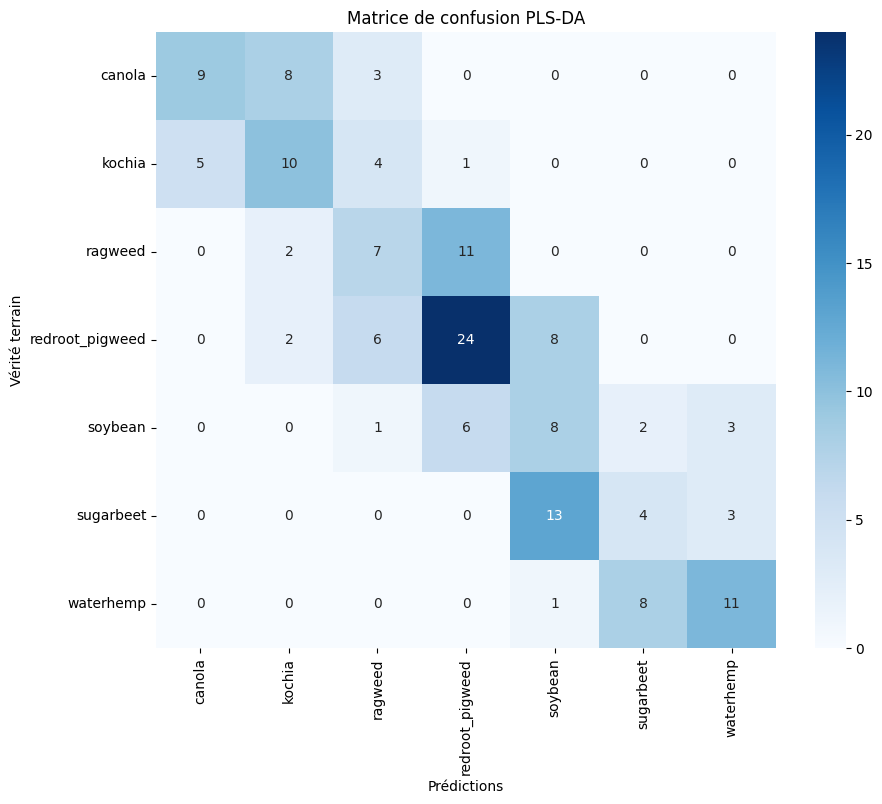

In [31]:
def calculate_important_wavelengths(pls_model, data):
    """Calcule l'importance des longueurs d'onde basée sur les scores VIP."""
    # Calcul des scores VIP
    t = pls_model.x_scores_
    w = pls_model.x_weights_
    q = pls_model.y_weights_
    p = pls_model.x_loadings_
    
    m = data.shape[1] - 1  # Nombre de longueurs d'onde
    p2 = np.sum(np.square(p), axis=1)
    w2 = np.sum(np.square(w), axis=1)
    
    vip_scores = np.sqrt(m * np.sum(np.square(w) * np.square(q), axis=1) / np.sum(p2 * w2))
    
    # Créer un DataFrame avec les longueurs d'onde et leurs scores
    important_wavelengths = pd.DataFrame({
        'wavelength': data.columns[:-1],  # Toutes les colonnes sauf 'class'
        'importance': vip_scores
    }).sort_values('importance', ascending=False)
    
    return important_wavelengths

def analyze_pls_results(pls_model, data, scaler, label_encoder):
    # Calculer les longueurs d'onde importantes
    important_wavelengths = calculate_important_wavelengths(pls_model, data)
    
    # Afficher la variance expliquée par composante
    explained_variance = np.var(pls_model.x_scores_, axis=0)
    explained_variance_ratio = explained_variance / np.sum(explained_variance)
    
    print("\nVariance expliquée par composante :")
    for i, var in enumerate(explained_variance_ratio[:5], 1):
        print(f"Composante {i}: {var*100:.2f}%")
    
    print("\nTop 10 longueurs d'onde les plus importantes :")
    print(important_wavelengths.head(10))
    
    # Matrice de confusion pour PLS
    y_pred = pls_model.predict(scaler.transform(data.iloc[:, :-1]))
    y_pred = np.clip(np.round(y_pred), 0, len(np.unique(label_encoder.transform(data['class']))) - 1).astype(int).ravel()
    
    plt.figure(figsize=(10, 8))
    cm = confusion_matrix(label_encoder.transform(data['class']), y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=label_encoder.classes_,
                yticklabels=label_encoder.classes_)
    plt.xlabel('Prédictions')
    plt.ylabel('Vérité terrain')
    plt.title('Matrice de confusion PLS-DA')
    plt.show()
    
    return important_wavelengths

# Exécuter l'analyse
important_wavelengths = analyze_pls_results(pls_model, data, scaler, label_encoder)

=== COMPARAISON DÉTAILLÉE DES MODÈLES ===

1. PERFORMANCES PAR CLASSE
--------------------------------------------------

RANDOM FOREST :
                 precision    recall  f1-score   support

         canola       0.86      1.00      0.92         6
         kochia       1.00      1.00      1.00         4
        ragweed       1.00      1.00      1.00         3
redroot_pigweed       1.00      1.00      1.00         7
        soybean       1.00      1.00      1.00         5
      sugarbeet       0.67      0.67      0.67         3
      waterhemp       1.00      0.75      0.86         4

       accuracy                           0.94        32
      macro avg       0.93      0.92      0.92        32
   weighted avg       0.94      0.94      0.94        32


PLS-DA :
                 precision    recall  f1-score   support

         canola       1.00      0.83      0.91         6
         kochia       1.00      1.00      1.00         4
        ragweed       0.75      1.00      0.86    

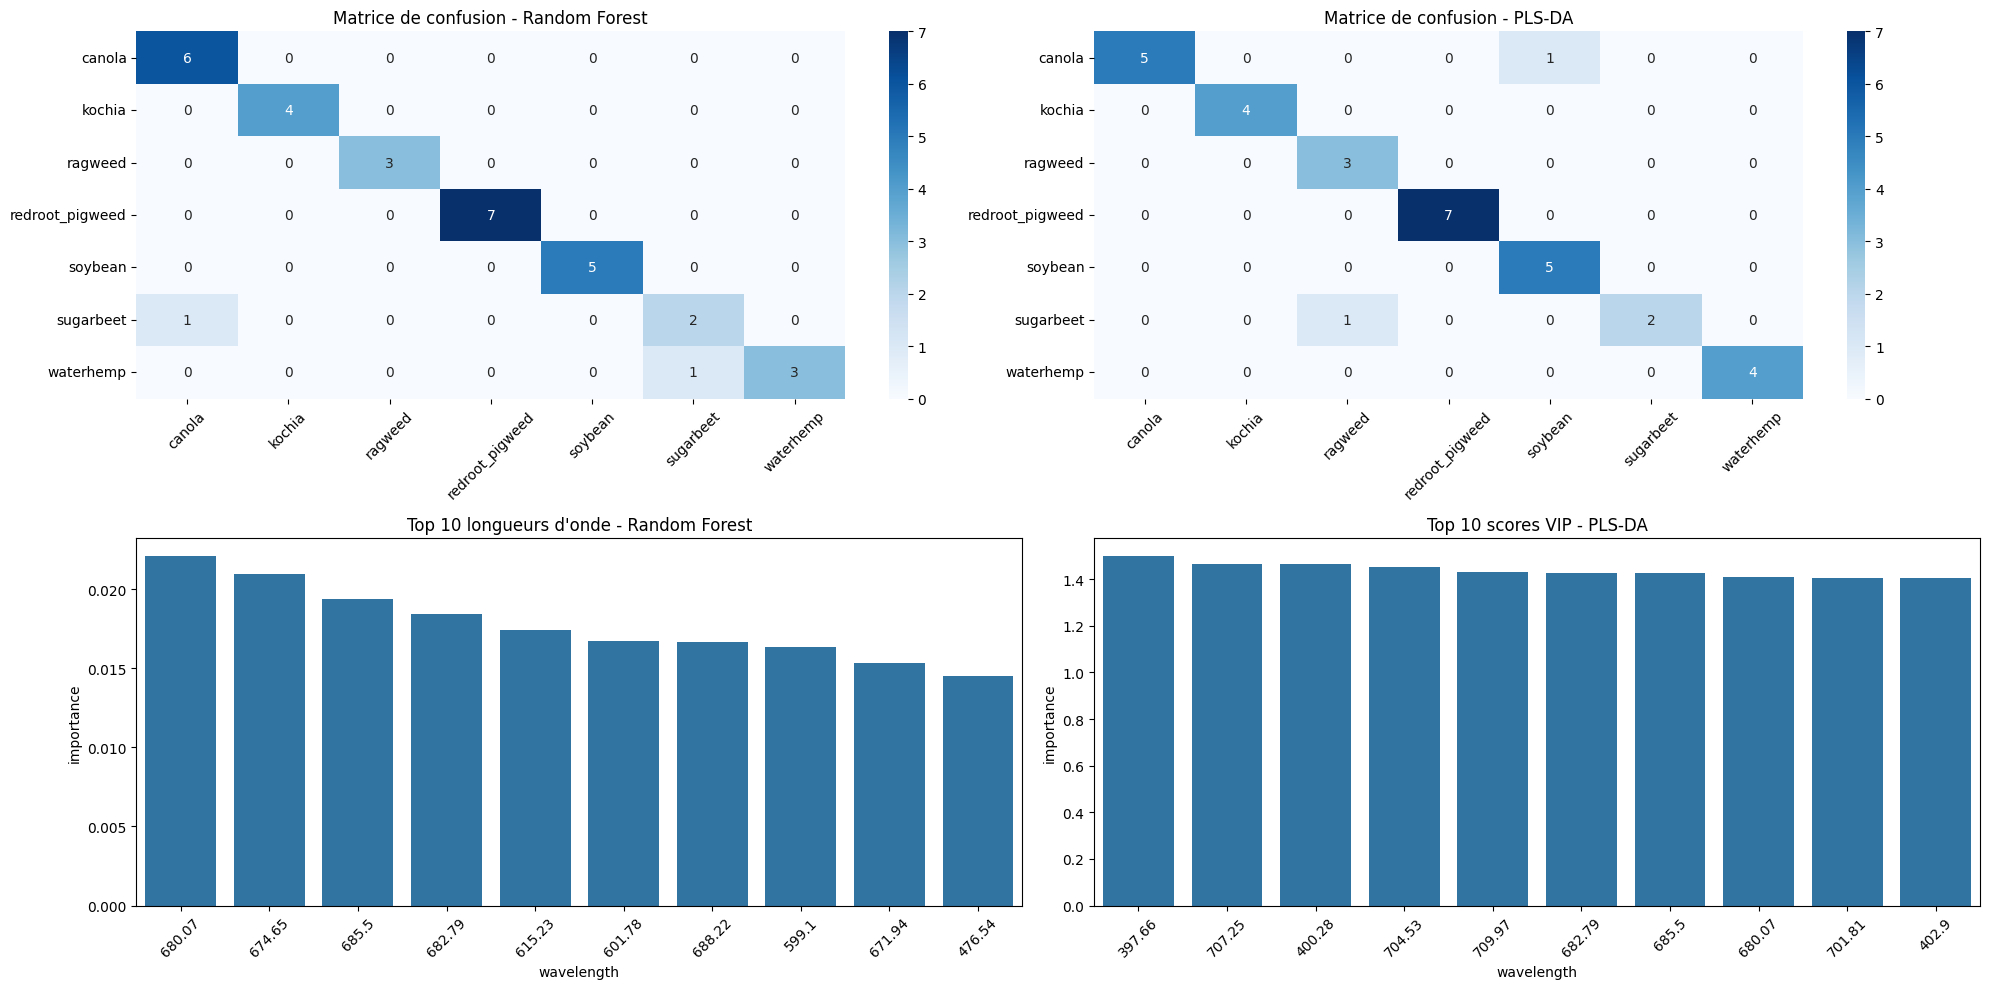


2. TABLEAU COMPARATIF DES PERFORMANCES
--------------------------------------------------

Métriques détaillées par classe :
                 RF_precision  RF_recall  RF_f1  PLS_precision  PLS_recall  \
canola                  0.857      1.000  0.923          1.000       0.833   
kochia                  1.000      1.000  1.000          1.000       1.000   
ragweed                 1.000      1.000  1.000          0.750       1.000   
redroot_pigweed         1.000      1.000  1.000          1.000       1.000   
soybean                 1.000      1.000  1.000          0.833       1.000   
sugarbeet               0.667      0.667  0.667          1.000       0.667   
waterhemp               1.000      0.750  0.857          1.000       1.000   

                 PLS_f1  
canola            0.909  
kochia            1.000  
ragweed           0.857  
redroot_pigweed   1.000  
soybean           0.909  
sugarbeet         0.800  
waterhemp         1.000  


In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

def calculate_vip_scores(pls, X):
    """Calcul des scores VIP (Variable Importance in Projection)"""
    t = pls.x_scores_
    w = pls.x_weights_
    q = pls.y_weights_
    
    m = X.shape[1]
    weighted_ss = np.sum(np.square(t), axis=0) * np.square(q)
    ss = np.sum(weighted_ss)
    
    weighted_sum = np.zeros(X.shape[1])
    for i in range(w.shape[0]):
        weighted_sum[i] = np.sum(np.square(w[i, :]) * weighted_ss)
    
    return np.sqrt(m * weighted_sum / ss)

def compare_models_detailed(X_train, X_test, y_train, y_test, label_encoder):
    """Comparaison détaillée entre Random Forest et PLS-DA"""
    # 1. Initialisation des modèles
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    n_classes = len(label_encoder.classes_)
    pls = PLSRegression(n_components=min(n_classes-1, X_train.shape[1]))
    
    # 2. Entraînement et prédictions
    # Random Forest
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)
    
    # PLS-DA
    y_train_encoded = label_encoder.transform(y_train)
    y_train_onehot = np.eye(n_classes)[y_train_encoded]
    pls.fit(X_train, y_train_onehot)
    y_pred_pls = np.argmax(pls.predict(X_test), axis=1)
    
    # 3. Calcul des métriques
    print("=== COMPARAISON DÉTAILLÉE DES MODÈLES ===\n")
    print("1. PERFORMANCES PAR CLASSE")
    print("-" * 50)
    
    # Random Forest
    print("\nRANDOM FOREST :")
    print(classification_report(y_test, y_pred_rf))
    
    # PLS-DA
    print("\nPLS-DA :")
    print(classification_report(y_test, label_encoder.inverse_transform(y_pred_pls)))
    
    # 4. Visualisations
    fig = plt.figure(figsize=(20, 10))
    
    # Matrices de confusion
    ax1 = plt.subplot(221)
    cm_rf = confusion_matrix(y_test, y_pred_rf)
    sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', ax=ax1,
                xticklabels=label_encoder.classes_,
                yticklabels=label_encoder.classes_)
    ax1.set_title('Matrice de confusion - Random Forest')
    plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
    
    ax2 = plt.subplot(222)
    cm_pls = confusion_matrix(y_test, label_encoder.inverse_transform(y_pred_pls))
    sns.heatmap(cm_pls, annot=True, fmt='d', cmap='Blues', ax=ax2,
                xticklabels=label_encoder.classes_,
                yticklabels=label_encoder.classes_)
    ax2.set_title('Matrice de confusion - PLS-DA')
    plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)
    
    # Importance des variables
    ax3 = plt.subplot(223)
    rf_importance = pd.DataFrame({
        'wavelength': X_train.columns,
        'importance': rf.feature_importances_
    }).sort_values('importance', ascending=False)
    
    sns.barplot(data=rf_importance.head(10), 
                x='wavelength', y='importance', ax=ax3)
    ax3.set_title('Top 10 longueurs d\'onde - Random Forest')
    plt.setp(ax3.xaxis.get_majorticklabels(), rotation=45)
    
    # VIP Scores
    ax4 = plt.subplot(224)
    try:
        vip_scores = calculate_vip_scores(pls, X_train)
        pls_importance = pd.DataFrame({
            'wavelength': X_train.columns,
            'importance': vip_scores
        }).sort_values('importance', ascending=False)
        
        sns.barplot(data=pls_importance.head(10), 
                    x='wavelength', y='importance', ax=ax4)
        ax4.set_title('Top 10 scores VIP - PLS-DA')
        plt.setp(ax4.xaxis.get_majorticklabels(), rotation=45)
    except Exception as e:
        print(f"Erreur dans le calcul des scores VIP: {str(e)}")
        ax4.text(0.5, 0.5, "Erreur dans le calcul des scores VIP", 
                ha='center', va='center')
    
    plt.tight_layout()
    plt.show()
    
    # 5. Tableau comparatif
    print("\n2. TABLEAU COMPARATIF DES PERFORMANCES")
    print("-" * 50)
    
    metrics_rf = classification_report(y_test, y_pred_rf, output_dict=True)
    metrics_pls = classification_report(
        y_test, 
        label_encoder.inverse_transform(y_pred_pls), 
        output_dict=True
    )
    
    comparison_df = pd.DataFrame({
        'RF_precision': [metrics_rf[c]['precision'] for c in label_encoder.classes_],
        'RF_recall': [metrics_rf[c]['recall'] for c in label_encoder.classes_],
        'RF_f1': [metrics_rf[c]['f1-score'] for c in label_encoder.classes_],
        'PLS_precision': [metrics_pls[c]['precision'] for c in label_encoder.classes_],
        'PLS_recall': [metrics_pls[c]['recall'] for c in label_encoder.classes_],
        'PLS_f1': [metrics_pls[c]['f1-score'] for c in label_encoder.classes_]
    }, index=label_encoder.classes_)
    
    print("\nMétriques détaillées par classe :")
    print(comparison_df.round(3))
    
    return rf, pls, comparison_df

# Exécution de la comparaison
rf_model, pls_model, comparison_metrics = compare_models_detailed(
    X_train, X_test, y_train, y_test, label_encoder
)